# Import necessary libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
data = pd.read_csv('global air pollution dataset.csv')

In [4]:
# Display basic information about the dataset
print("Dataset Overview:")
print(data.head())
print("\nDataset Summary:")
print(data.describe())
print("\nDataset Information:")
print(data.info())

Dataset Overview:
              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0    

In [5]:
# Handling Missing Values
print("\nHandling Missing Values...")
missing_values = data.isnull().sum()
print("Missing Values Before Cleaning:")
print(missing_values)



Handling Missing Values...
Missing Values Before Cleaning:
Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


# Handling Missing Values

In [14]:
print("\nHandling Missing Values...")
# Fill missing values for numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())



Handling Missing Values...


In [15]:
# Fill missing values for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

print("Missing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
pollutant_sum         0
pollutant_avg         0
dtype: int64


# Encoding Categorical Variables

In [16]:
print("\nEncoding Categorical Variables...")
le_country = LabelEncoder()
le_city = LabelEncoder()

if 'Country' in data.columns:
    data['Country'] = le_country.fit_transform(data['Country'])
else:
    print("Column 'Country' not found.")

if 'City' in data.columns:
    data['City'] = le_city.fit_transform(data['City'])
else:
    print("Column 'City' not found.")



Encoding Categorical Variables...


# Feature Engineering

In [17]:
print("\nFeature Engineering...")
try:
    pollutant_columns = ['CO AQI Value', 'NO2 AQI Value', 'Ozone AQI Value']  # Replace with actual column names
    data['pollutant_sum'] = data[pollutant_columns].sum(axis=1)  # Sum of pollutants
    data['pollutant_avg'] = data[pollutant_columns].mean(axis=1)  # Average of pollutants
    print("Feature engineering completed successfully.")
except KeyError as e:
    print(f"Error in Feature Engineering: {e}")


Feature Engineering...
Feature engineering completed successfully.


# Data Visualization: Distribution of PM2.5 AQI Value

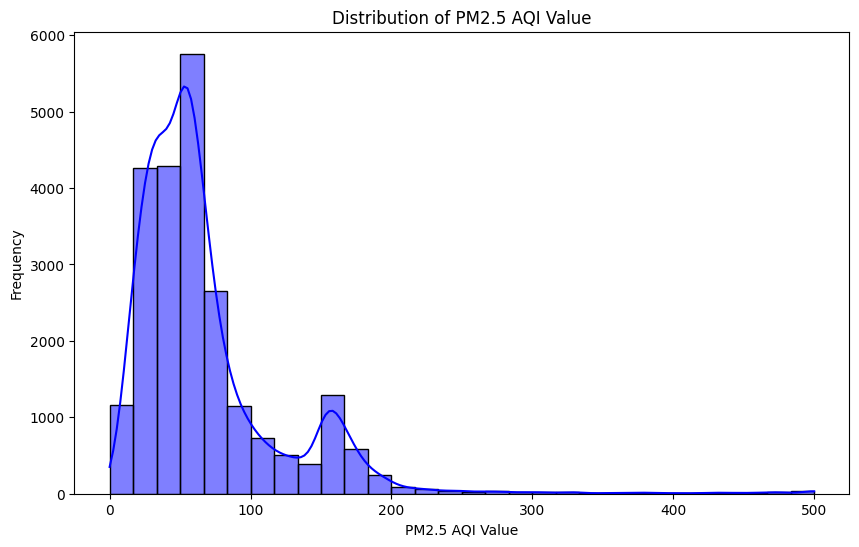

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['PM2.5 AQI Value'], kde=True, bins=30, color='blue')
plt.title('Distribution of PM2.5 AQI Value')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix 

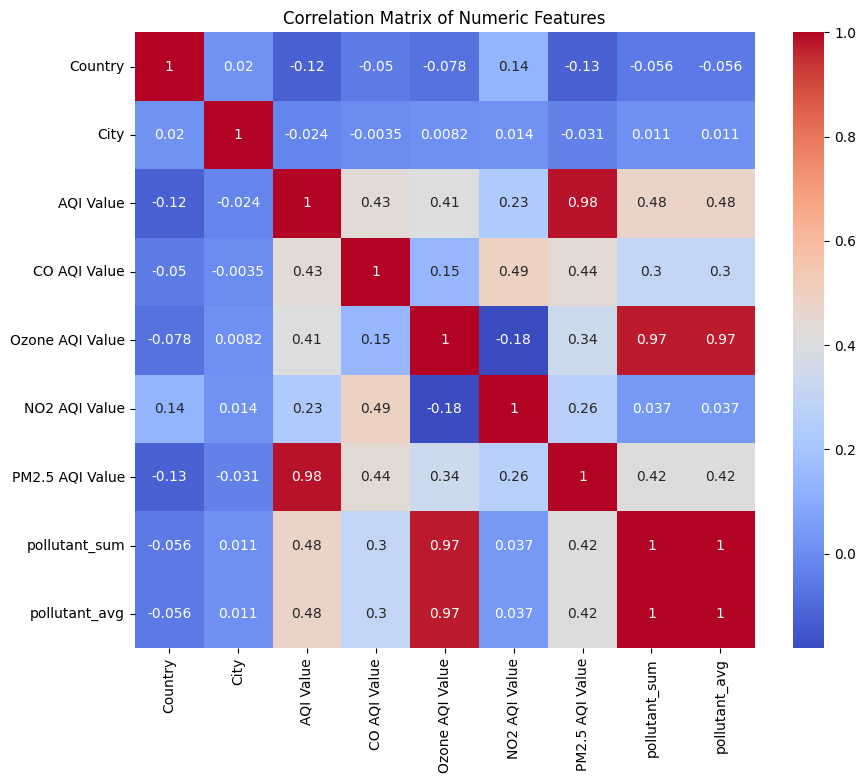

In [ ]:

plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=['number'])  # Select numeric columns only
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


# Scatterplot: PM2.5 vs Pollutant Sum

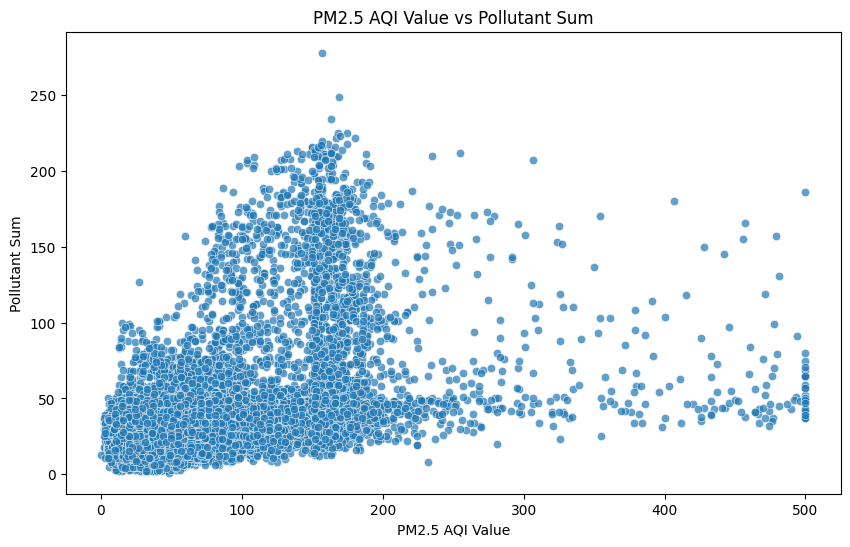

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['PM2.5 AQI Value'], y=data['pollutant_sum'], alpha=0.7)
plt.title('PM2.5 AQI Value vs Pollutant Sum')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Pollutant Sum')
plt.show()


# PM2.5 Distribution by Selected Countries


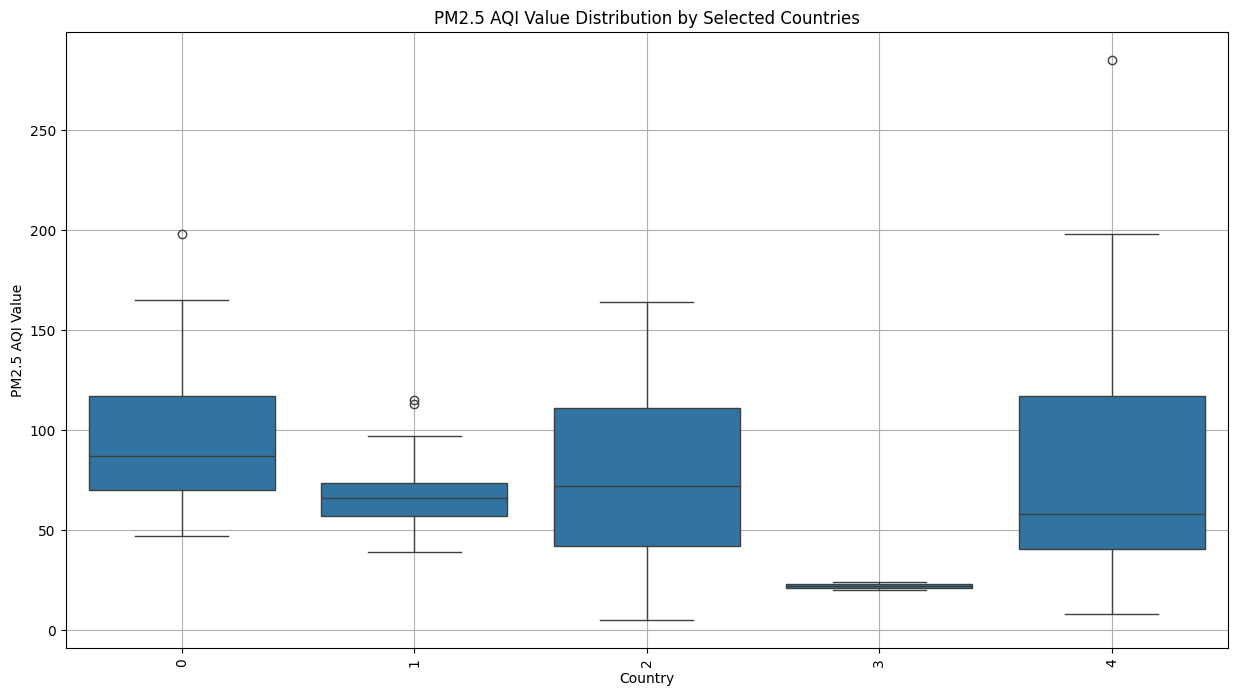

In [40]:
selected_countries = [0, 1, 2, 3, 4]  # Replace these with your country codes
selected_country_names = [le_country.classes_[c] for c in selected_countries]  # Names of selected countries
selected_data = data[data['Country'].isin(selected_countries)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='PM2.5 AQI Value', data=selected_data)
plt.xticks(ticks=range(len(selected_countries)), labels=selected_country_names, rotation=90)
plt.title('PM2.5 AQI Value Distribution by Selected Countries')
plt.xlabel('Country')
plt.ylabel('PM2.5 AQI Value')
plt.grid()
plt.show()

# Pairplot of Pollutants and PM2.5 AQI Value

<Figure size 640x480 with 0 Axes>

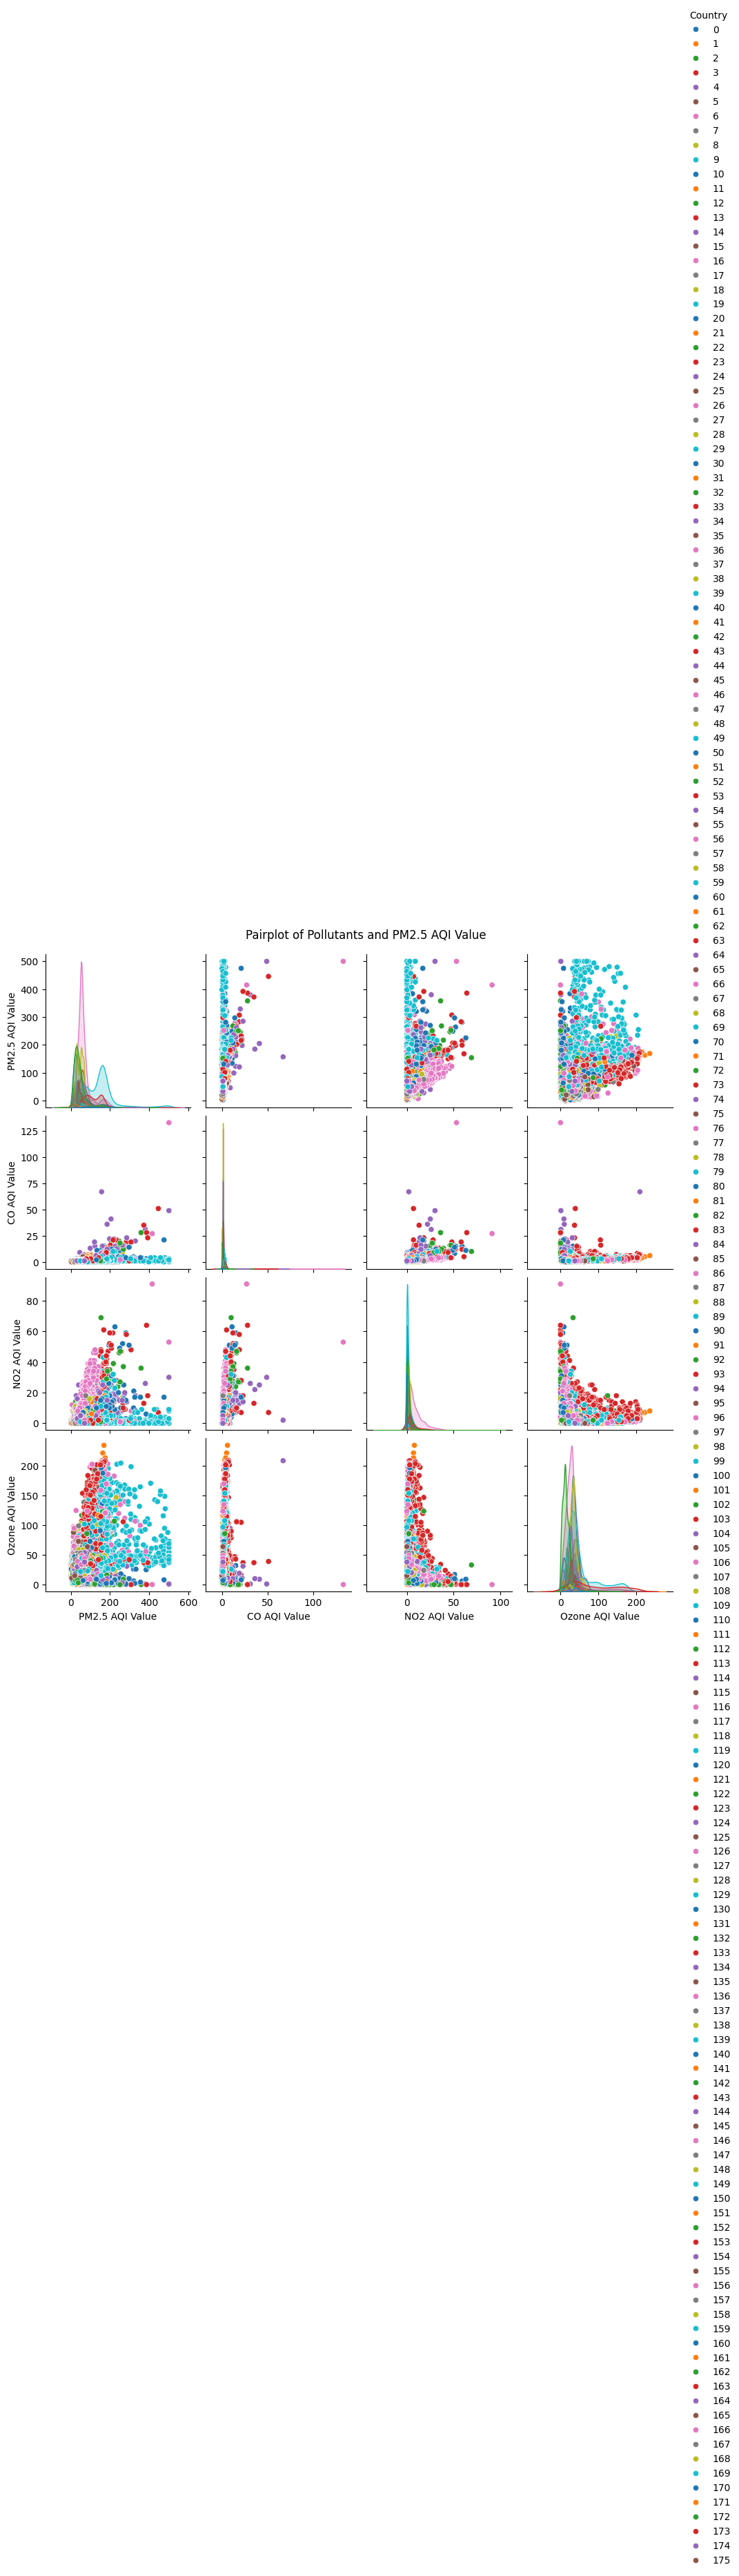

In [41]:
plt.figure()
sns.pairplot(data, vars=['PM2.5 AQI Value', 'CO AQI Value', 'NO2 AQI Value', 'Ozone AQI Value'], hue='Country', palette='tab10', diag_kind='kde')
plt.suptitle('Pairplot of Pollutants and PM2.5 AQI Value', y=1.02)
plt.show()

# Average PM2.5 by Country (Bar Plot)

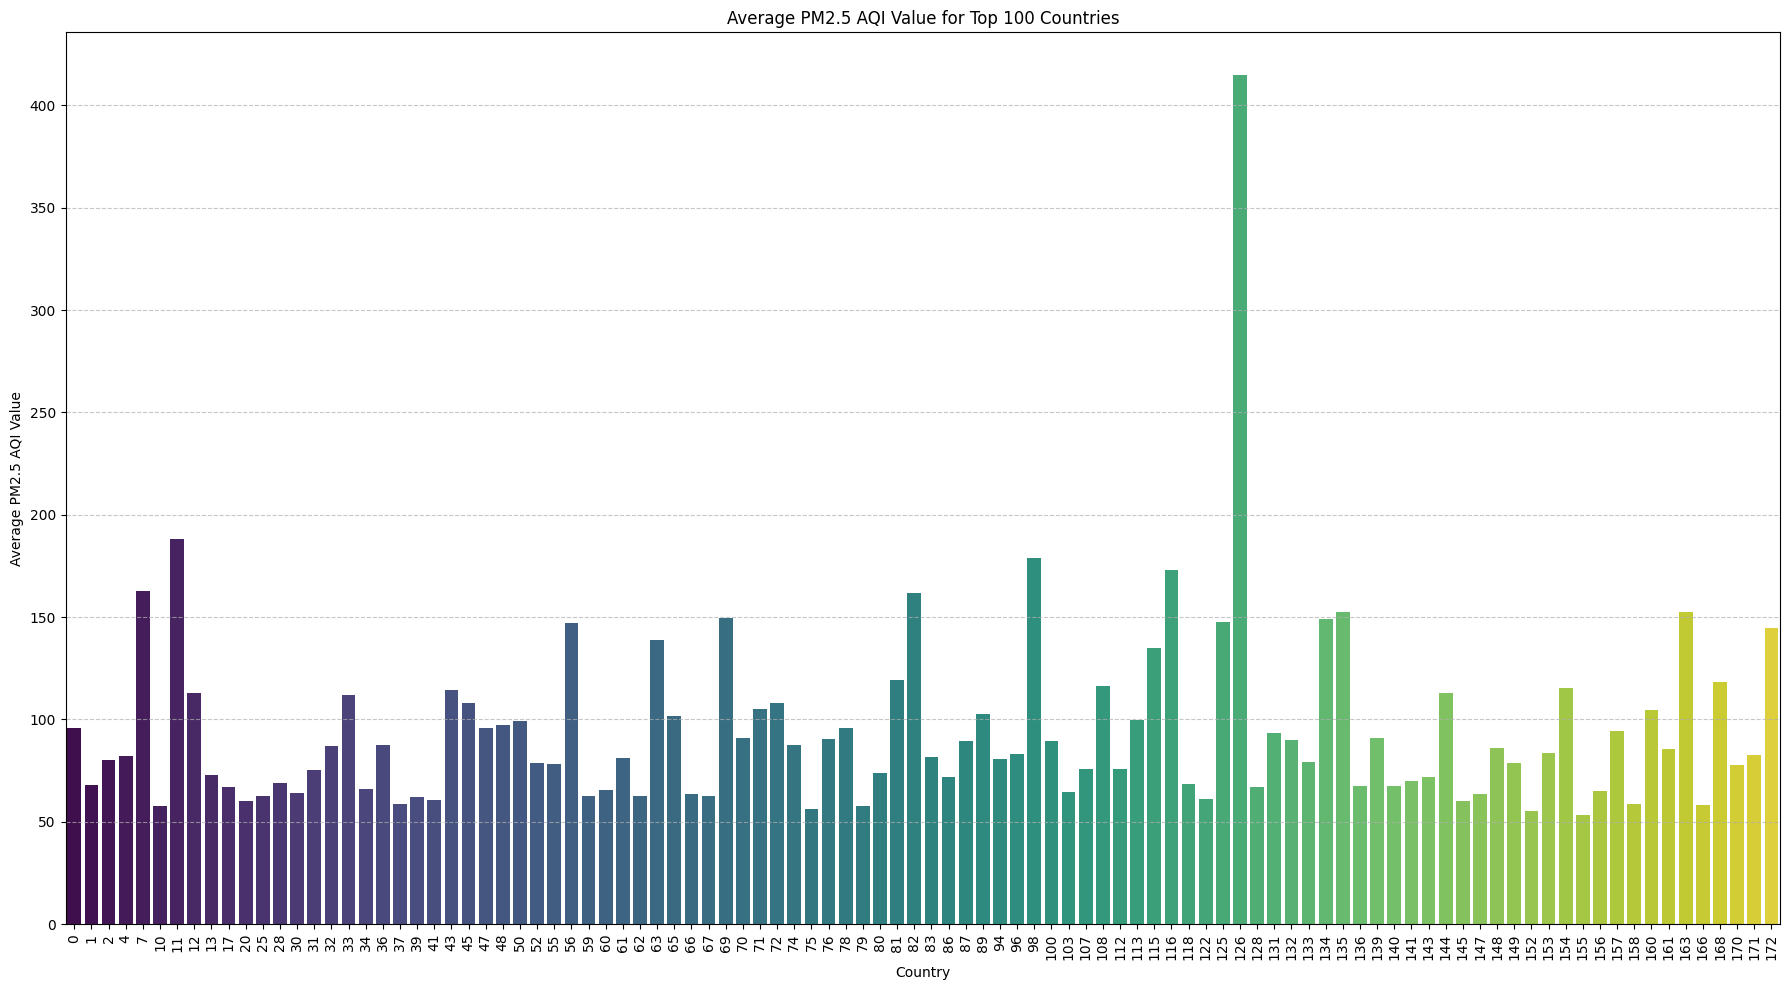

In [49]:
# Compute the average PM2.5 AQI value by country
avg_pm25_by_country = data.groupby('Country')['PM2.5 AQI Value'].mean().sort_values(ascending=False)

# Select only the first 100 rows
avg_pm25_top100 = avg_pm25_by_country.head(100)

# Map encoded country indices back to their names
country_names_top100 = le_country.inverse_transform(avg_pm25_top100.index)

# Create a bar plot for the top 100 countries
plt.figure(figsize=(18, 10))
sns.barplot(x=country_names_top100, y=avg_pm25_top100.values, palette='viridis')
plt.xticks(rotation=90, fontsize=10)  # Rotate and format country names
plt.title('Average PM2.5 AQI Value for Top 100 Countries')
plt.xlabel('Country')
plt.ylabel('Average PM2.5 AQI Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent label cut-offs
plt.show()


# Heatmap of Pollutants by Country

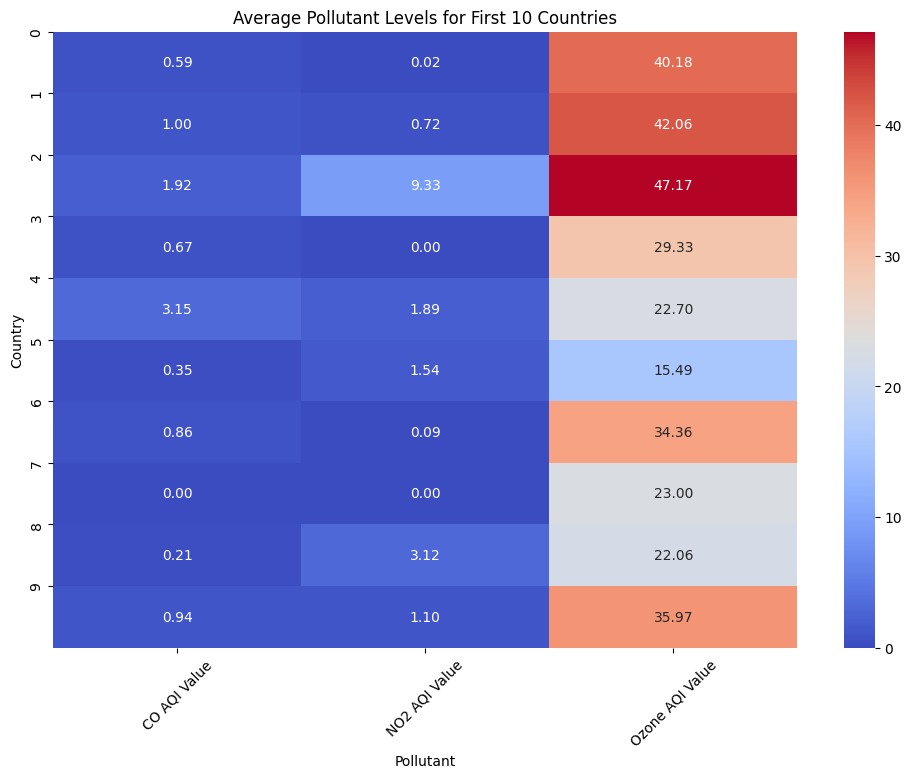

In [46]:
# Compute the average pollutant levels by country
pollutant_avg_by_country = data.groupby('Country')[['CO AQI Value', 'NO2 AQI Value', 'Ozone AQI Value']].mean()

# Select only the first 10 rows
pollutant_avg_top10 = pollutant_avg_by_country.head(10)

# Create a heatmap for the top 10 countries
plt.figure(figsize=(12, 8))
sns.heatmap(pollutant_avg_top10, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average Pollutant Levels for First 10 Countries')
plt.xlabel('Pollutant')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.yticks(ticks=range(len(pollutant_avg_top10.index)), labels=le_country.inverse_transform(pollutant_avg_top10.index))
plt.show()


In [34]:
# Filter data for "United Kingdom of Great Britain and Northern Ireland"
uk_data = data[data['Country'] == 'United Kingdom of Great Britain and Northern Ireland']

# Check if UK data exists
if uk_data.empty:
    print("No data available for the United Kingdom.")
else:
    print(f"United Kingdom Data Overview:\n{uk_data.head()}")

    # 1. Distribution of PM2.5 AQI Value in the UK
    plt.figure(figsize=(10, 6))
    sns.histplot(uk_data['PM2.5 AQI Value'], kde=True, bins=30, color='blue')
    plt.title('Distribution of PM2.5 AQI Value in the UK')
    plt.xlabel('PM2.5 AQI Value')
    plt.ylabel('Frequency')
    plt.show()

    # 2. Boxplot of AQI Values by City in the UK
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=uk_data['City'], y=uk_data['AQI Value'])
    plt.title('AQI Value Distribution by City in the UK')
    plt.xlabel('City')
    plt.ylabel('AQI Value')
    plt.xticks(rotation=45)
    plt.show()

    # 3. Scatterplot: PM2.5 AQI Value vs Pollutant Sum in the UK
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=uk_data['PM2.5 AQI Value'], y=uk_data['pollutant_sum'], hue=uk_data['City'], palette='coolwarm', s=100)
    plt.title('PM2.5 AQI Value vs Pollutant Sum in the UK')
    plt.xlabel('PM2.5 AQI Value')
    plt.ylabel('Pollutant Sum')
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # 4. Line Plot: Pollutant Sum Over Cities in the UK
    plt.figure(figsize=(12, 6))
    uk_city_pollutants = uk_data.groupby('City')['pollutant_sum'].mean().sort_values()
    uk_city_pollutants.plot(kind='line', marker='o', color='green')
    plt.title('Average Pollutant Sum Across Cities in the UK')
    plt.xlabel('City')
    plt.ylabel('Pollutant Sum')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

    # 5. Pairplot: Relationships Between Pollutants in the UK
    sns.pairplot(uk_data[['PM2.5 AQI Value', 'CO AQI Value', 'NO2 AQI Value', 'Ozone AQI Value']], diag_kind='kde', corner=True)
    plt.suptitle('Relationships Between Pollutants in the UK', y=1.02)
    plt.show()


No data available for the United Kingdom.


# Prepare Data for Modeling

In [22]:
print("\nPreparing Data for Modeling...")
X = data[['AQI Value', 'pollutant_sum', 'pollutant_avg', 'CO AQI Value', 'NO2 AQI Value', 'Ozone AQI Value']]
y = data['PM2.5 AQI Value']



Preparing Data for Modeling...


# Train-Test Split


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Split Completed.")

# Model Building: Random Forest Regressor
print("\nTraining Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

Data Split Completed.

Training Random Forest Regressor...


RandomForestRegressor(random_state=42)

# Predictions

In [24]:
y_pred = rf_model.predict(X_test)

# Model Evaluation

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:\nMean Squared Error: {mse:.2f}\nR2 Score: {r2:.2f}")



Model Performance:
Mean Squared Error: 31.35
R2 Score: 0.99


# Feature Importance Visualization

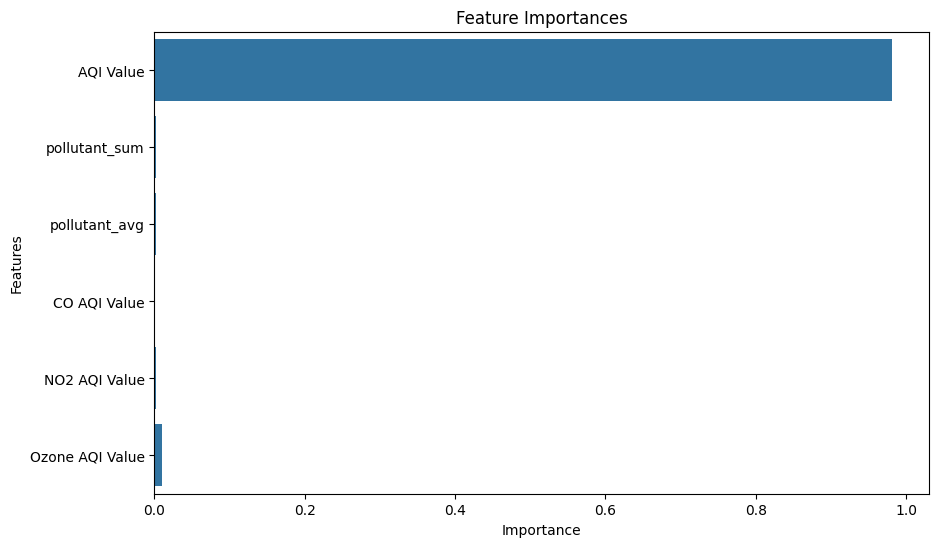

In [26]:
importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# Actual vs Predicted Scatterplot

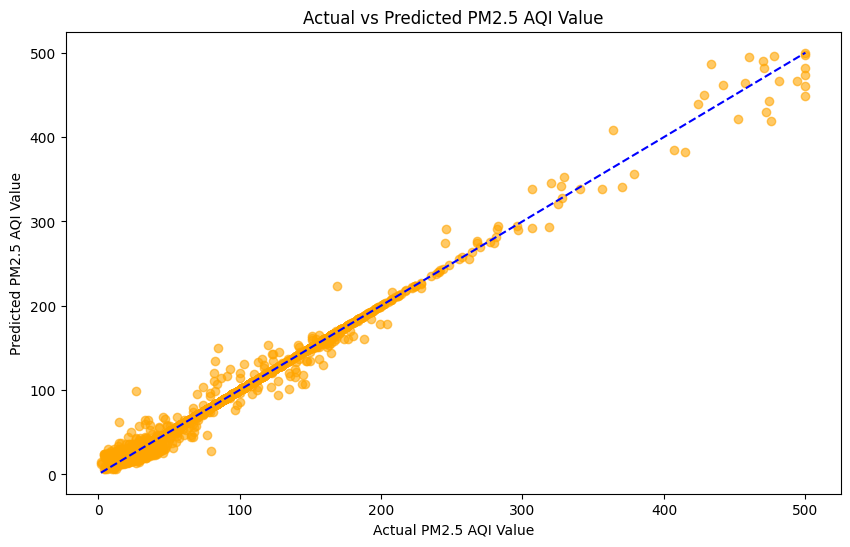

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='blue')
plt.title('Actual vs Predicted PM2.5 AQI Value')
plt.xlabel('Actual PM2.5 AQI Value')
plt.ylabel('Predicted PM2.5 AQI Value')
plt.show()

# Save Predictions to CSV


In [28]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv('predictions.csv', index=False)
print("\nPredictions saved to 'predictions.csv'.")


Predictions saved to 'predictions.csv'.
